<a href="https://colab.research.google.com/github/apester/IME/blob/main/Lab19_LSTM_GRU_Predictive_Maintenance_Complete_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔧 Predictive Maintenance with LSTM and GRU

This notebook demonstrates and compares the performance of **LSTM** and **GRU** models on simulated industrial sensor data for predictive maintenance tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM, GRU, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

## 📊 Simulate Industrial Sensor Data

In [2]:
np.random.seed(0)
n_samples = 10000
timestamps = np.arange(n_samples)
vibration = np.sin(timestamps / 50) + np.random.normal(0, 0.1, n_samples)
temperature = 70 + 5 * np.sin(timestamps / 100) + np.random.normal(0, 0.5, n_samples)
current = 10 + np.random.normal(0, 0.3, n_samples)
failures = (timestamps % 500 == 0).astype(int)
df = pd.DataFrame({'vibration': vibration, 'temperature': temperature, 'current': current, 'failure': failures})
df.head()

,vibration,temperature,current,failure
0,0.176405,69.898941,10.099014,1
1,0.060014,69.633384,9.999856,0
2,0.137863,70.966793,10.245435,0
3,0.284053,70.245302,10.128464,0
4,0.266670,70.111041,9.248816,0


## 🧹 Preprocess Data and Create Sequences

In [3]:
# Normalize features
scaler = StandardScaler()
features = ['vibration', 'temperature', 'current']
df[features] = scaler.fit_transform(df[features])

# Create sequences
def create_sequences(df, window_size=50):
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df[features].iloc[i:i+window_size].values)
        y.append(df['failure'].iloc[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Train LSTM and GRU Model

In [4]:
lstm_model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.9226 - loss: 0.2857 - val_accuracy: 0.9975 - val_loss: 0.0180
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9978 - loss: 0.0151 - val_accuracy: 0.9975 - val_loss: 0.0178
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9975 - loss: 0.0186 - val_accuracy: 0.9975 - val_loss: 0.0179
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9970 - loss: 0.0217 - val_accuracy: 0.9975 - val_loss: 0.0188
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9982 - loss: 0.0133 - val_accuracy: 0.9975 - val_loss: 0.0182


In [5]:
gru_model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    GRU(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()
gru_history = gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        13,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9000 - loss: 0.3643 - val_accuracy: 0.9975 - val_loss: 0.0203
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9974 - loss: 0.0187 - val_accuracy: 0.9975 - val_loss: 0.0186
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9974 - loss: 0.0186 - val_accuracy: 0.9975 - val_loss: 0.0188
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9975 - loss: 0.0176 - val_accuracy: 0.9975 - val_loss: 0.0188
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9984 - loss: 0.0126 - val_accuracy: 0.9975 - val_loss: 0.0188


## 🤖 Evaluation of LSTMS and GRU with Zero Division Handling

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1990
   macro avg       0.50      0.50      0.50      1990
weighted avg       1.00      1.00      1.00      1990



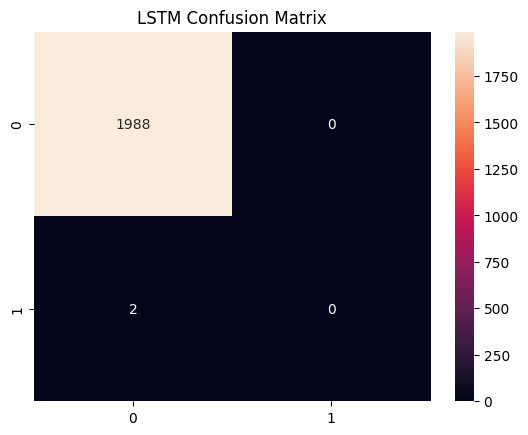

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
GRU Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1990
   macro avg       0.50      0.50      0.50      1990
weighted avg       1.00      1.00      1.00      1990



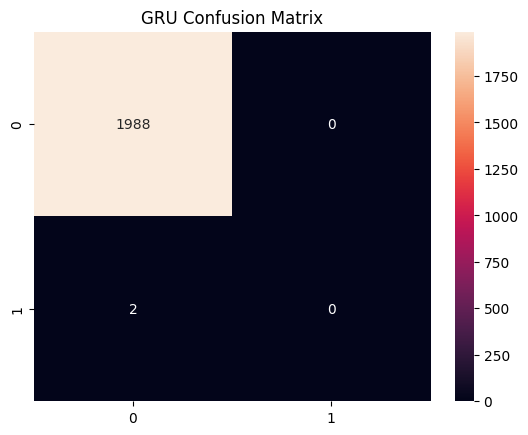

In [6]:
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)
print('LSTM Evaluation:\n', classification_report(y_test, y_pred_lstm, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt='d')
plt.title('LSTM Confusion Matrix')
plt.show()

y_pred_gru = (gru_model.predict(X_test) > 0.5).astype(int)
print('GRU Evaluation:\n', classification_report(y_test, y_pred_gru, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_gru), annot=True, fmt='d')
plt.title('GRU Confusion Matrix')
plt.show()